In [5]:
# Analyze the articles dataset distribution
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

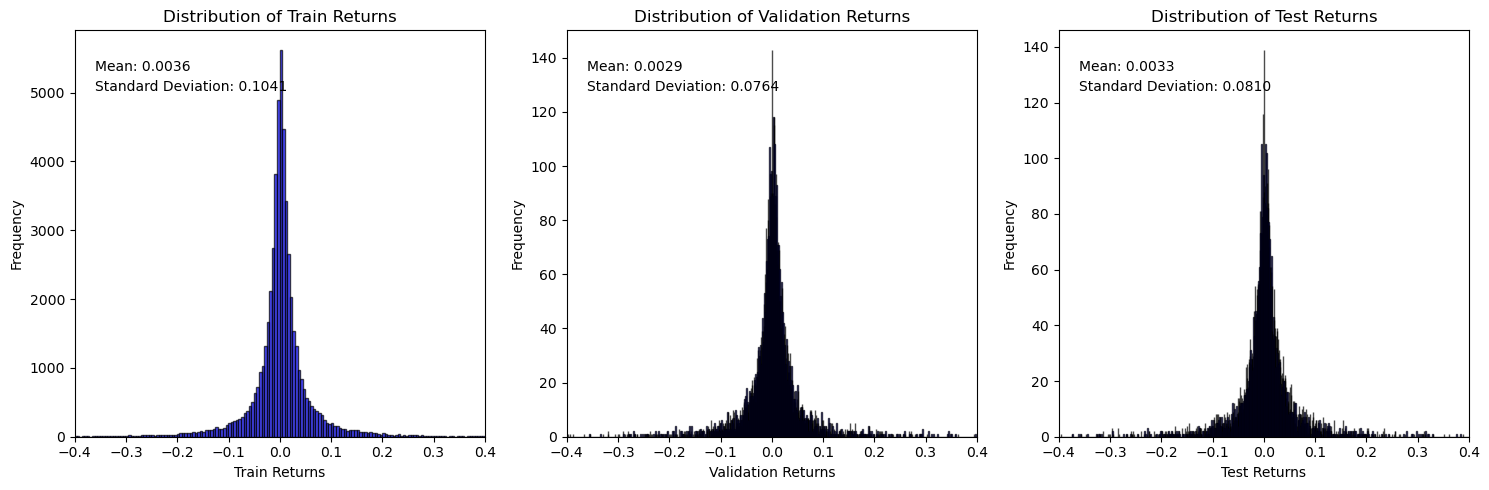

In [6]:
def split(df):
    x_train, x_test_and_val, y_train, y_test_and_val  = train_test_split(df['title'], df['returns'], random_state=42, test_size=0.2) # train set is 80%,
    x_test, x_val, y_test, y_val = train_test_split(x_test_and_val, y_test_and_val, test_size=0.5, random_state=42) # test and val are 50% of the remaining 20% = 10%. 
    return x_train, y_train, x_val, y_val, x_test, y_test

def plot_returns(ax, datasetType, returns, bins=None):
    # If bins isn't specified, set it to 1/10th of the number of returns

    ax.hist(returns, bins=bins, alpha=0.7, color='b', edgecolor='black')
    ax.set_xlabel(f'{datasetType} Returns')
    ax.set_ylabel('Frequency')
    ax.set_title(f'Distribution of {datasetType} Returns')
    ax.set_xlim(-0.4, 0.4)

    # Calculate mean and standard deviation
    mean_return = np.mean(returns)
    std_deviation = np.std(returns)

    # Add mean and standard deviation to the plot
    ax.text(0.05, 0.9, f'Mean: {mean_return:.4f}', transform=ax.transAxes)
    ax.text(0.05, 0.85, f'Standard Deviation: {std_deviation:.4f}', transform=ax.transAxes)

def display_return_plots(y_train, y_val, y_test):
    # Create subplots
    _, axs = plt.subplots(1, 3, figsize=(15, 5))

    # Plot train, val, and test returns
    plot_returns(axs[0], 'Train', y_train, bins=2000)
    plot_returns(axs[1], 'Validation', y_val, bins=3000)
    plot_returns(axs[2], 'Test', y_test, bins=3000)

    plt.tight_layout()
    plt.show()

dataset = pd.read_pickle('Data/test_set.pkl')
x_train, y_train, x_val, y_val, x_test, y_test = split(dataset)
display_return_plots(y_train, y_val, y_test)